In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Banglore_traffic_Dataset.csv")
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [6]:
df.isnull().sum()

Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Year'] = df['Date'].dt.year

In [9]:
df['Month'] = df['Date'].dt.month

In [10]:
df['Day'] = df['Date'].dt.day

In [11]:
df['Weekday'] = df['Date'].dt.weekday

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8936 non-null   datetime64[ns]
 1   Area Name                           8936 non-null   object        
 2   Road/Intersection Name              8936 non-null   object        
 3   Traffic Volume                      8936 non-null   int64         
 4   Average Speed                       8936 non-null   float64       
 5   Travel Time Index                   8936 non-null   float64       
 6   Congestion Level                    8936 non-null   float64       
 7   Road Capacity Utilization           8936 non-null   float64       
 8   Incident Reports                    8936 non-null   int64         
 9   Environmental Impact                8936 non-null   float64       
 10  Public Transport Usage  

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [15]:
df['Weather Conditions'] = label_encoder.fit_transform(df['Weather Conditions'])

In [16]:
df['Roadwork and Construction Activity'] = label_encoder.fit_transform(df['Roadwork and Construction Activity'])

In [17]:
df.drop(columns=['Date'], inplace=True)

In [18]:
df.isnull().sum()

Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
Year                                  0
Month                                 0
Day                                   0
Weekday                               0
dtype: int64

## EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

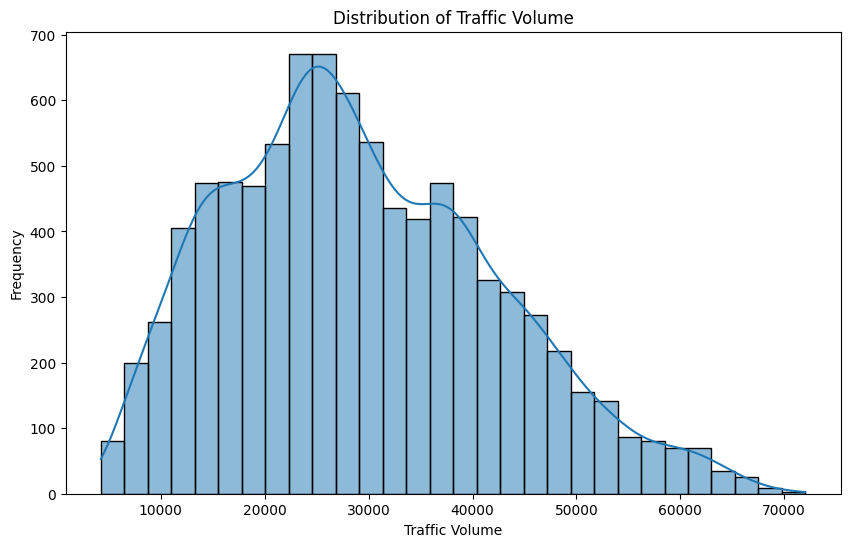

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Traffic Volume'], kde=True, bins=30)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

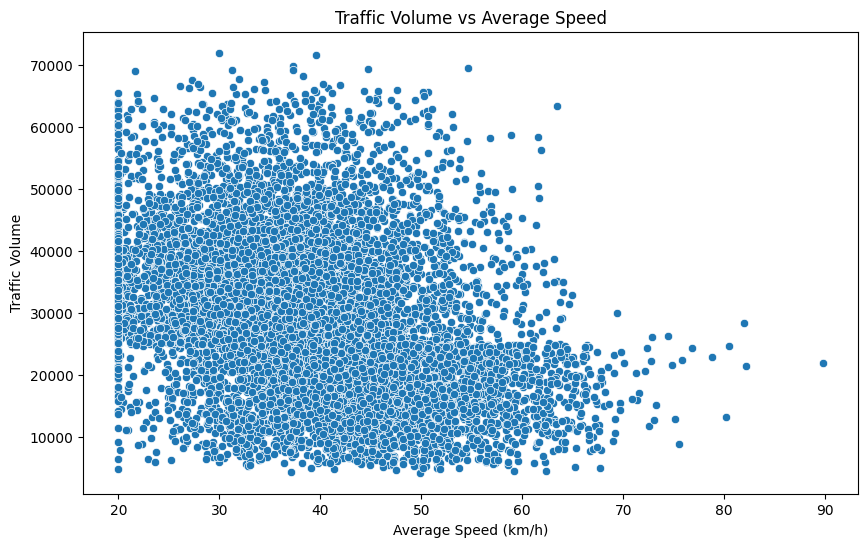

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Speed', y='Traffic Volume', data=df)
plt.title('Traffic Volume vs Average Speed')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Traffic Volume')
plt.show()

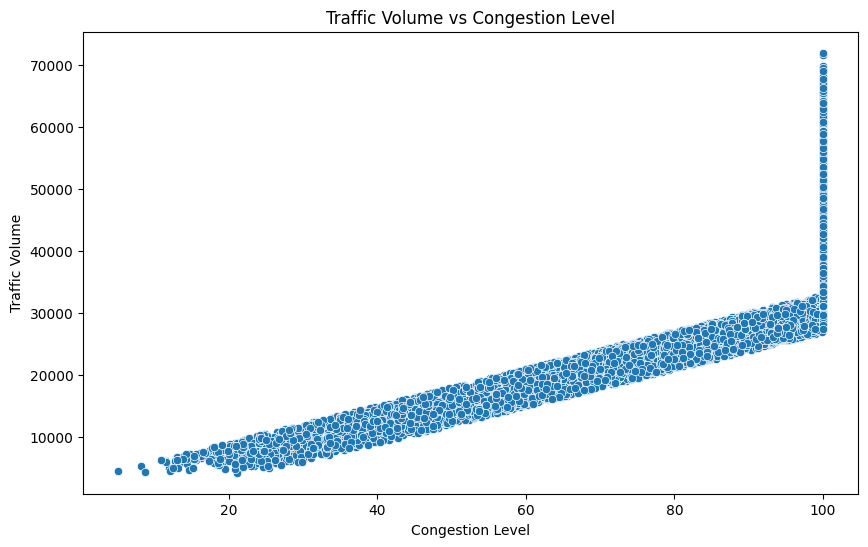

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Congestion Level', y='Traffic Volume', data=df)
plt.title('Traffic Volume vs Congestion Level')
plt.xlabel('Congestion Level')
plt.ylabel('Traffic Volume')
plt.show()

In [25]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
numeric_columns

Index(['Traffic Volume', 'Average Speed', 'Travel Time Index',
       'Congestion Level', 'Road Capacity Utilization', 'Incident Reports',
       'Environmental Impact', 'Public Transport Usage',
       'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

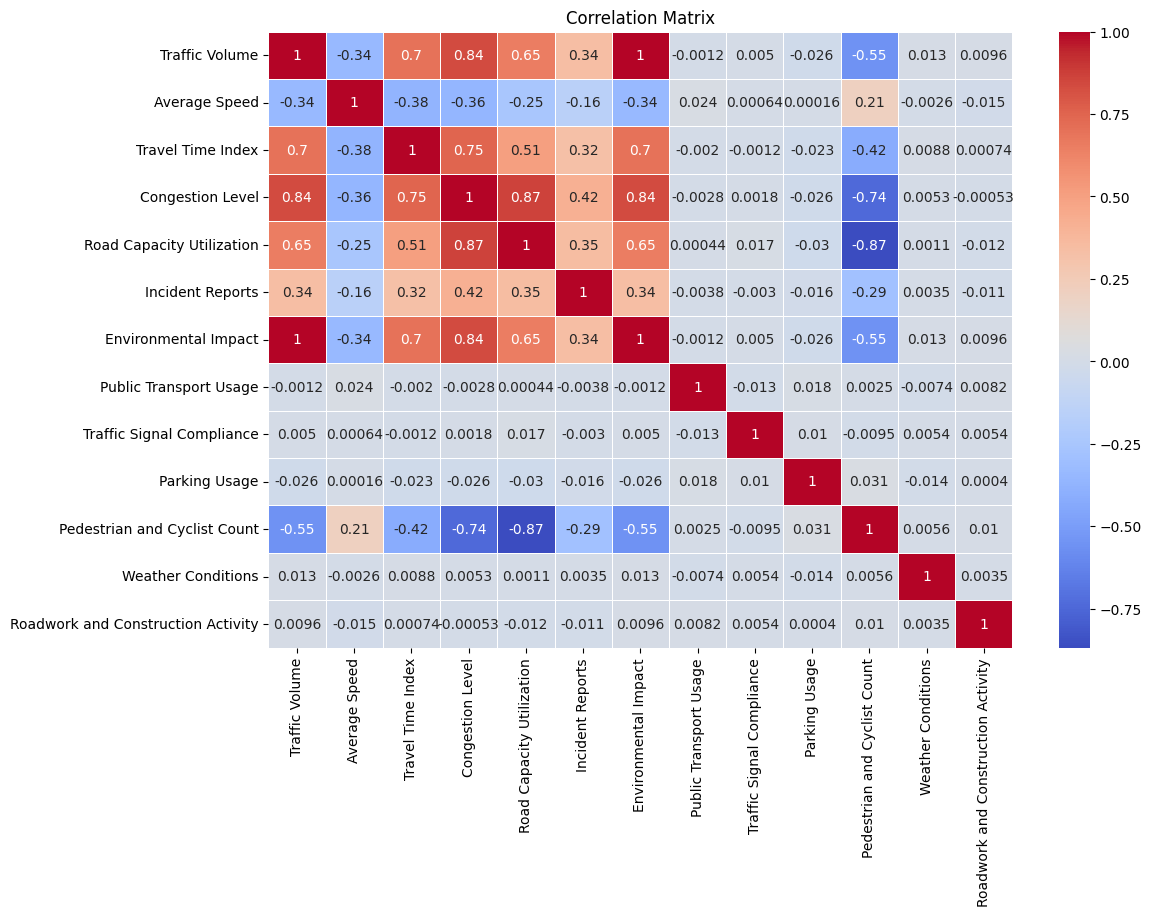

In [26]:
plt.figure(figsize=(12,8))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Objectives:
1. **Traffic Volume Prediction**: Predict traffic volume on different roads in Bangalore.
2. **Congestion Level Classification**: Classify congestion levels into categories (Low, Medium, High).
3. **Incident Detection**: Predict incident reports based on traffic data.

## Traffic Volume Prediction - Random Forest Regressor

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
categorical_cols = ['Area Name', 'Road/Intersection Name', 'Weather Conditions', 'Roadwork and Construction Activity']

In [40]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [42]:
X = df_encoded.drop(columns=['Traffic Volume', 'Congestion Level', 'Incident Reports'])

In [43]:
y_traffic_volume = df_encoded['Traffic Volume']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_traffic_volume, test_size=0.2, random_state=42)

In [45]:
rf_regressor = RandomForestRegressor(random_state=42)

In [46]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred = rf_regressor.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)

In [51]:
rmse = mean_squared_error(y_test, y_pred)

In [52]:
r2 = r2_score(y_test, y_pred)

In [55]:
print(mse)
print(rmse)
print(r2)

1172.87141549218
1172.87141549218
0.9999930102838459


### Congestion Level Classification - Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [57]:
congestion_labels = ['Low', 'Medium', 'High']

In [58]:
df['Congestion Level Category'] = pd.cut(df['Congestion Level'], bins=[0, 33, 66, 100], labels=congestion_labels)

In [64]:
categorical_cols = ['Area Name', 'Road/Intersection Name', 'Weather Conditions', 'Roadwork and Construction Activity']

In [65]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [66]:
y_congestion = df_encoded['Congestion Level Category']

In [67]:
X_classification = df_encoded.drop(columns=['Congestion Level', 'Traffic Volume', 'Incident Reports', 'Congestion Level Category'])

In [68]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_congestion, test_size=0.2, random_state=42)

In [69]:
rf_classifier = RandomForestClassifier(random_state=42)

In [70]:
rf_classifier.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [71]:
y_pred_class = rf_classifier.predict(X_test_class)

In [73]:
classification_rep = classification_report(y_test_class, y_pred_class, target_names=congestion_labels)
print(classification_rep)

              precision    recall  f1-score   support

         Low       0.97      0.98      0.98      1334
      Medium       0.78      0.70      0.74        84
        High       0.87      0.85      0.86       370

    accuracy                           0.94      1788
   macro avg       0.87      0.84      0.86      1788
weighted avg       0.94      0.94      0.94      1788



## Incident Detection - Random Forest Classifier

In [101]:
categorical_cols = ['Area Name', 'Road/Intersection Name']

In [102]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [104]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Traffic Volume                              8936 non-null   int64   
 1   Average Speed                               8936 non-null   float64 
 2   Travel Time Index                           8936 non-null   float64 
 3   Congestion Level                            8936 non-null   float64 
 4   Road Capacity Utilization                   8936 non-null   float64 
 5   Incident Reports                            8936 non-null   int64   
 6   Environmental Impact                        8936 non-null   float64 
 7   Public Transport Usage                      8936 non-null   float64 
 8   Traffic Signal Compliance                   8936 non-null   float64 
 9   Parking Usage                               8936 non-null   float64 
 10  

In [105]:
X_incident_classification = df_encoded.drop(columns=['Congestion Level', 'Traffic Volume', 'Incident Reports'])

In [106]:
X_train_incident, X_test_incident, y_train_incident, y_test_incident = train_test_split(X_incident_classification, y_incident, test_size=0.2, random_state=42)

In [108]:
# Ensure all categorical columns are properly encoded
from sklearn.preprocessing import LabelEncoder

# Convert 'Congestion Level Category' if it's still categorical
if 'Congestion Level Category' in df_encoded.columns and df_encoded['Congestion Level Category'].dtype == 'object':
    label_encoder = LabelEncoder()
    df_encoded['Congestion Level Category'] = label_encoder.fit_transform(df_encoded['Congestion Level Category'])

# Ensure all features are numerical before scaling
non_numeric_cols = df_encoded.select_dtypes(exclude=['number']).columns.tolist()

if non_numeric_cols:
    print(f"Warning: These columns are still non-numeric and will be removed: {non_numeric_cols}")
    df_encoded.drop(columns=non_numeric_cols, inplace=True)

# Prepare features (X) and target variable (y) for incident detection
y_incident = df_encoded['Incident Reports']
X_incident_classification = df_encoded.drop(columns=['Congestion Level', 'Traffic Volume', 'Incident Reports'])

# Split the data into train and test sets
X_train_incident, X_test_incident, y_train_incident, y_test_incident = train_test_split(
    X_incident_classification, y_incident, test_size=0.2, random_state=42
)

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_train_incident_scaled = scaler.fit_transform(X_train_incident)
X_test_incident_scaled = scaler.transform(X_test_incident)

# Confirm that scaling is successful
X_train_incident_scaled[:5]


array([[-0.53927883,  0.75804369,  0.4821345 , -0.14327434, -1.52675196,
        -0.67431289, -1.20120553, -0.697023  , -0.69645774, -0.33052823,
        -1.10817569, -1.19284419,  0.37661678,  1.00912115],
       [-0.97978764,  0.00894627, -0.99369294, -1.08223538, -1.72902778,
         1.37968371, -1.46533962,  0.33765897,  1.73513455, -0.33052823,
        -1.10817569,  0.01218005, -0.075336  , -0.48811776],
       [ 0.58969792,  0.75804369,  0.4821345 ,  0.89597678,  0.00640908,
         0.35309609,  0.7926883 , -0.34305285, -0.69645774, -0.33052823,
         1.48300515, -0.59033207, -0.97924157,  1.50820078],
       [ 0.43405769,  0.75804369,  0.4821345 ,  1.77545542, -1.38947511,
         1.21640211,  0.10588648, -0.31582438,  1.73513455,  3.02546015,
        -1.10817569,  1.51846035,  0.15064039,  0.01096188],
       [ 1.9222804 ,  0.75804369,  0.4821345 ,  0.39475694, -0.10821022,
        -0.51781892,  0.94833153,  0.28320202, -0.69645774, -0.33052823,
         1.48300515,  0.31

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_train_incident_scaled = scaler.fit_transform(X_train_incident)
X_test_incident_scaled = scaler.transform(X_test_incident)

In [119]:
rf_incident_classifier = RandomForestClassifier(random_state=42)
rf_incident_classifier.fit(X_train_incident_scaled, y_train_incident)

RandomForestClassifier(random_state=42)

In [120]:
y_pred_incident = rf_incident_classifier.predict(X_test_incident_scaled)

In [121]:
incident_classification_report = classification_report(y_test_incident, y_pred_incident)

/Users/rohitwagh/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rohitwagh/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rohitwagh/jupyter_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [122]:
print(incident_classification_report)

              precision    recall  f1-score   support

           0       0.50      0.55      0.53       491
           1       0.27      0.36      0.31       490
           2       0.26      0.33      0.29       399
           3       0.09      0.04      0.05       226
           4       0.00      0.00      0.00       116
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2

    accuracy                           0.33      1788
   macro avg       0.12      0.14      0.13      1788
weighted avg       0.28      0.33      0.30      1788



## Conclusion 

In [123]:
# Project Summary
# - Traffic Volume Prediction: Achieved high R² with Random Forest Regressor.
# - Congestion Level Classification: 94% accuracy with Random Forest Classifier.
# - Incident Detection: Model trained with Random Forest Classifier but requires further improvements.

## Traffic Flow Optimization - KMeans Clustering

In [128]:
from sklearn.cluster import KMeans

In [130]:
X_clustering = df.select_dtypes(include=['float64', 'int64'])

In [131]:
scaler_for_clustering = StandardScaler()

In [132]:
X_clustering_scaled = scaler_for_clustering.fit_transform(X_clustering)

In [133]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_clustering_scaled)

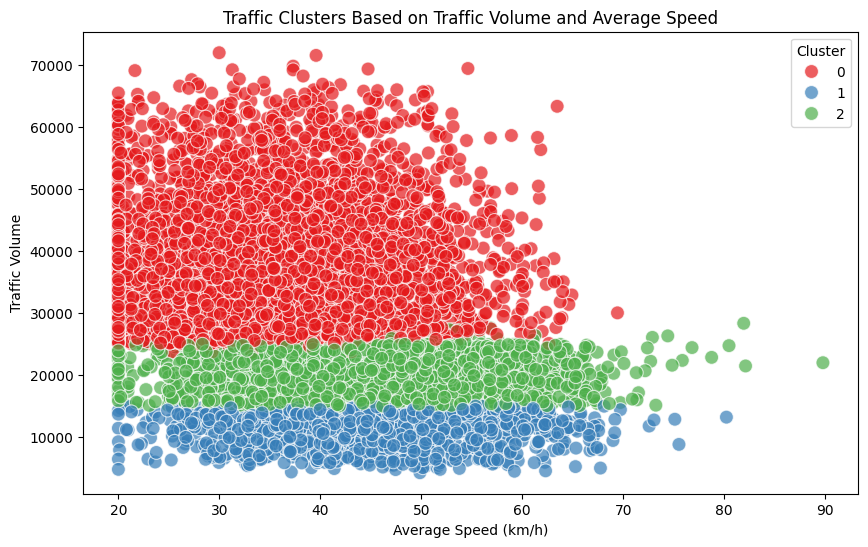

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Speed', y='Traffic Volume', hue='Cluster', palette='Set1', data=df, s=100, alpha=0.7)
plt.title('Traffic Clusters Based on Traffic Volume and Average Speed')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Traffic Volume')
plt.legend(title='Cluster')
plt.show()

In [135]:
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_clustering.columns)
cluster_centers_df

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,0.659773,-0.372061,0.749682,0.711355,0.480677,0.314692,0.659773,-0.002950,-0.006139,-0.018906,-0.399489,0.009787,0.002425
1,-1.387861,0.515470,-1.055409,-1.855013,-2.181838,-0.730159,-1.387861,0.007739,-0.024089,0.069377,2.312385,0.007235,0.022268
2,-0.675777,0.526555,-1.051851,-0.533335,0.145084,-0.285196,-0.675777,0.002186,0.026436,0.003244,-0.392309,-0.025173,-0.017386


## Conclusion

### Key Findings:
1. **Cluster 0: High Traffic, Moderate Congestion**
   - High vehicle density causing moderate congestion.
   - **Solution:** Expand road capacity, improve traffic signals.

2. **Cluster 1: Low Traffic, High Congestion**
   - High congestion despite low traffic (bottlenecks).
   - **Solution:** Infrastructure upgrades, pedestrian lane optimizations.

3. **Cluster 2: Balanced Traffic and Low Congestion**
   - Efficient traffic flow, ideal road utilization.
   - **Solution:** Maintain current policies and replicate best practices.


### Recommendations:
🚦 **Smart Traffic Management:** Implement AI-based **dynamic traffic control**.  
🛣️ **Infrastructure Planning:** Expand lanes in Cluster 1, optimize public transport in Cluster 0.  
📊 **Real-Time Monitoring:** Use predictive models to prevent congestion spikes.  